merge the data wei and wenjun gave me so that she could discuss that with a professor in syracuse and for submission as a poster to iconference

08-14-2018

overall structure:
- question_dummy
- role_dummy
- politeness_offline
- politeness_web
- gender
- topic_diversity
- sentiment_score

i may add an index so that i can merge scores back

08-23-2018. include question and answer index

09-01-2018. add a column that shows the url of the correspnding content for easier check

09-02-2018: bug identified - w/o adding url, the dataset had fewer rows, check why this happens, although the `text` column is identical

---

In [1]:
import os
import pandas as pd
%matplotlib inline

get a list of disease names

In [2]:
base_dir = '../excel-data/'

In [3]:
name_list = [fn[6:-4] for fn in os.listdir(base_dir+'offline/')]
len(name_list)

89

---

#### test

read `offline` and `web` simultaneously

In [4]:
i = 0
name = name_list[i]
name

'Dermatology Topics'

In [5]:
name = 'Gastroenterology Topics'

In [6]:
type_ = 'offline'

In [7]:
df = pd.read_table(base_dir+type_+'/score_{}.xls'.format(name))
df.shape

(1977, 21)

In [8]:
df.head(2)

,Disease,Topic,Url,Question No,Question,Answer,Asker ID,Asker Type,Asker Gender,Asker Dummy,...,Answerer Title,Answerer ID,Answerer Type,Answerer Gender,Answer Dummy,Answerer Age,Question Time Stamp,Answer Time Stamp,Question Score,Answer Score
0,Gastroenterology Topics,"VOMITTING WHITE FOAM, SEVERE UPPER ABDOMINAL A...",https://www.doctorslounge.com/forums/./viewtop...,0,"HI, I AM A 28Y/O FEMALE WITH FIBRO AND RA. I ...","Hi, It is possible that long term aspirin inta...",BUCSFAN6998,Patient,Female,1.0,...,Medical Doctor,Dr.M.Aroon kamath,Doctor,Male,0.0,69.0,"Tue Jul 06, 2010 8:56 pm","Tue Sep 14, 2010 8:23 am",0.71,0.97
1,Gastroenterology Topics,"Loose Motion,Vomiting Due to Climate Change. -",https://www.doctorslounge.com/forums/./viewtop...,0,Dear All.I need some immediate advice in a mat...,"Hello,It is quite common for travelers to get ...",ahmeed80,Patient,Male,0.0,...,Medical Doctor,Dr.M.jagesh kamath,Doctor,Male,0.0,68.0,"Tue Aug 17, 2010 2:41 pm","Mon Sep 06, 2010 10:32 am",0.57,0.92


In [9]:
df.columns

Index(['Disease', 'Topic', 'Url', 'Question No', 'Question', 'Answer',
       'Asker ID', 'Asker Type', 'Asker Gender', 'Asker Dummy', 'Asker Age',
       'Answerer Title', 'Answerer ID', 'Answerer Type', 'Answerer Gender',
       'Answer Dummy', 'Answerer Age', 'Question Time Stamp',
       'Answer Time Stamp', 'Question Score', 'Answer Score'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,disease,topic,url,question_no,question,answer,asker_id,asker_type,asker_gender,asker_dummy,...,answerer_title,answerer_id,answerer_type,answerer_gender,answer_dummy,answerer_age,question_time_stamp,answer_time_stamp,question_score,answer_score
0,Gastroenterology Topics,"VOMITTING WHITE FOAM, SEVERE UPPER ABDOMINAL A...",https://www.doctorslounge.com/forums/./viewtop...,0,"HI, I AM A 28Y/O FEMALE WITH FIBRO AND RA. I ...","Hi, It is possible that long term aspirin inta...",BUCSFAN6998,Patient,Female,1.0,...,Medical Doctor,Dr.M.Aroon kamath,Doctor,Male,0.0,69.0,"Tue Jul 06, 2010 8:56 pm","Tue Sep 14, 2010 8:23 am",0.71,0.97
1,Gastroenterology Topics,"Loose Motion,Vomiting Due to Climate Change. -",https://www.doctorslounge.com/forums/./viewtop...,0,Dear All.I need some immediate advice in a mat...,"Hello,It is quite common for travelers to get ...",ahmeed80,Patient,Male,0.0,...,Medical Doctor,Dr.M.jagesh kamath,Doctor,Male,0.0,68.0,"Tue Aug 17, 2010 2:41 pm","Mon Sep 06, 2010 10:32 am",0.57,0.92


##### read score data

the scores here are calculated separately.

In [11]:
web_score_df = pd.read_table(base_dir+'web/score_{}.xls'.format(name), usecols=[19, 20])
web_score_df.columns = web_score_df.columns.str.lower().str.replace(' ', '_') + '_web'
web_score_df.head(2)

,question_score_web,answer_score_web
0,Neutral,Polite Algorithm's Confidence: 80%
1,Polite Algorithm's Confidence: 62%,Polite Algorithm's Confidence: 78%


a wrapper function to parse `web` scores

In [12]:
def parse_web_score(score_string):
    ''' parse politeness score by web interface'''
    score_string = score_string.lower()
    if 'neutral' in score_string:
        return 0
    else:
        score = int(score_string.split(': ')[-1].replace('%', ''))/100
    if 'impolite' in score_string:
        return -score
    else:
        return score

In [13]:
parse_web_score(web_score_df.loc[3, 'question_score_web'])

0.95

In [14]:
for col in web_score_df.columns:
    web_score_df[col] = web_score_df[col].map(parse_web_score)
web_score_df.head(2)

,question_score_web,answer_score_web
0,0.00,0.80
1,0.62,0.78


In [16]:
web_score_df.shape[0] == df.shape[0]

True

##### merge

merge the two

In [17]:
for col in web_score_df.columns:
    df[col] = web_score_df[col].values
df.head(2)

,disease,topic,url,question_no,question,answer,asker_id,asker_type,asker_gender,asker_dummy,...,answerer_type,answerer_gender,answer_dummy,answerer_age,question_time_stamp,answer_time_stamp,question_score,answer_score,question_score_web,answer_score_web
0,Gastroenterology Topics,"VOMITTING WHITE FOAM, SEVERE UPPER ABDOMINAL A...",https://www.doctorslounge.com/forums/./viewtop...,0,"HI, I AM A 28Y/O FEMALE WITH FIBRO AND RA. I ...","Hi, It is possible that long term aspirin inta...",BUCSFAN6998,Patient,Female,1.0,...,Doctor,Male,0.0,69.0,"Tue Jul 06, 2010 8:56 pm","Tue Sep 14, 2010 8:23 am",0.71,0.97,0.00,0.80
1,Gastroenterology Topics,"Loose Motion,Vomiting Due to Climate Change. -",https://www.doctorslounge.com/forums/./viewtop...,0,Dear All.I need some immediate advice in a mat...,"Hello,It is quite common for travelers to get ...",ahmeed80,Patient,Male,0.0,...,Doctor,Male,0.0,68.0,"Tue Aug 17, 2010 2:41 pm","Mon Sep 06, 2010 10:32 am",0.57,0.92,0.62,0.78


In [18]:
df[['question_score', 'question_score_web', 'answer_score', 'answer_score_web']].corr()

,question_score,question_score_web,answer_score,answer_score_web
question_score,1.000000,0.836948,0.072258,0.073439
question_score_web,0.836948,1.000000,0.065268,0.073621
answer_score,0.072258,0.065268,1.000000,0.799862
answer_score_web,0.073439,0.073621,0.799862,1.000000


In [19]:
df[['question_score', 'question_score_web', 'answer_score', 'answer_score_web']].corr(method='spearman')

,question_score,question_score_web,answer_score,answer_score_web
question_score,1.000000,0.856763,0.063985,0.066715
question_score_web,0.856763,1.000000,0.050501,0.062804
answer_score,0.063985,0.050501,1.000000,0.840005
answer_score_web,0.066715,0.062804,0.840005,1.000000


In [20]:
df.head(3)

,disease,topic,url,question_no,question,answer,asker_id,asker_type,asker_gender,asker_dummy,...,answerer_type,answerer_gender,answer_dummy,answerer_age,question_time_stamp,answer_time_stamp,question_score,answer_score,question_score_web,answer_score_web
0,Gastroenterology Topics,"VOMITTING WHITE FOAM, SEVERE UPPER ABDOMINAL A...",https://www.doctorslounge.com/forums/./viewtop...,0,"HI, I AM A 28Y/O FEMALE WITH FIBRO AND RA. I ...","Hi, It is possible that long term aspirin inta...",BUCSFAN6998,Patient,Female,1.0,...,Doctor,Male,0.0,69.0,"Tue Jul 06, 2010 8:56 pm","Tue Sep 14, 2010 8:23 am",0.71,0.97,0.00,0.80
1,Gastroenterology Topics,"Loose Motion,Vomiting Due to Climate Change. -",https://www.doctorslounge.com/forums/./viewtop...,0,Dear All.I need some immediate advice in a mat...,"Hello,It is quite common for travelers to get ...",ahmeed80,Patient,Male,0.0,...,Doctor,Male,0.0,68.0,"Tue Aug 17, 2010 2:41 pm","Mon Sep 06, 2010 10:32 am",0.57,0.92,0.62,0.78
2,Gastroenterology Topics,Treatment options for Blastocystis? -,https://www.doctorslounge.com/forums/./viewtop...,0,"Hello, After going through a bit of an ordeal...","Hello, The question posed by the following art...",marplz,Patient,Male,0.0,...,Doctor,Male,0.0,68.0,"Fri Aug 13, 2010 7:19 am","Sun Sep 05, 2010 10:42 am",0.88,0.56,0.75,0.00


In [21]:
df.url.values[0]

'https://www.doctorslounge.com/forums/./viewtopic.php?f=58&t=47171&sid=5597e6a76959d804954c231098a3e325'

In [22]:
pd.np.all(['https://www.doctorslounge.com/forums/./viewtopic.php?' in val for val in df.url.values])

True

##### reshape

now get to the hard part: `question_no=0` means a ___reset___ of a thread, therefore the `question` may have already been in the list.

~~i will take a simple approach and just match `question` and `asker_id` textual content~~

drop duplicates to eliminate questions that occur multiple times due to multiple answers

update on 09-01-2018. also keep the `url` columns: note that we only need for parameters (`f`, `t`, and `sid`) part

In [73]:
reshape_l = list()

In [74]:
q_columns = ['question', 'asker_gender', 'asker_type', 'asker_age', 'question_score', 'question_score_web']
a_columns = ['answer', 'answerer_gender', 'answerer_type', 'answerer_age', 'answer_score', 'answer_score_web']
q_columns += ['url']
a_columns += ['url']

In [75]:
reshape_columns = ['text', 'gender', 'role_dummy', 'age', 'politeness', 'politeness_web', 'url', 'question_flag']

In [76]:
for i, series in df.iterrows():
    #print(series.loc[['question', 'asker_gender', 'asker_dummy', 'asker_age', 'question_score', 'question_score_web']])
    #print(series)
    q_list = series.loc[q_columns].tolist()
    ## use `0` in `question_no` as a breakpoint between different question/answer pairs
    ## there may be identical questions posted
    if series['question_no'] == 0:
        q_list.append(1)
        reshape_l.append(dict(zip(reshape_columns, q_list)))
    a_list = series.loc[a_columns].tolist()
    a_list.append(0)
    reshape_l.append(dict(zip(reshape_columns, a_list)))
reshape_df = pd.DataFrame(reshape_l)

In [77]:
reshape_df.shape

(3651, 8)

In [78]:
reshape_df.duplicated().sum()

0

In [81]:
reshape_df.head(20)

,age,gender,politeness,politeness_web,question_flag,role_dummy,text,url
0,36.0,Female,0.71,0.00,1,Patient,"HI, I AM A 28Y/O FEMALE WITH FIBRO AND RA. I ...",https://www.doctorslounge.com/forums/./viewtop...
1,69.0,Male,0.97,0.80,0,Doctor,"Hi, It is possible that long term aspirin inta...",https://www.doctorslounge.com/forums/./viewtop...
2,37.0,Male,0.57,0.62,1,Patient,Dear All.I need some immediate advice in a mat...,https://www.doctorslounge.com/forums/./viewtop...
3,68.0,Male,0.92,0.78,0,Doctor,"Hello,It is quite common for travelers to get ...",https://www.doctorslounge.com/forums/./viewtop...
4,53.0,Male,0.88,0.75,1,Patient,"Hello, After going through a bit of an ordeal...",https://www.doctorslounge.com/forums/./viewtop...
5,68.0,Male,0.56,0.00,0,Doctor,"Hello, The question posed by the following art...",https://www.doctorslounge.com/forums/./viewtop...
6,33.0,Female,0.96,0.95,1,Patient,"Hi, I am a 25 yr old female and I think I migh...",https://www.doctorslounge.com/forums/./viewtop...
7,69.0,Male,0.78,-0.62,0,Doctor,"Hi, Your symptoms are not ""typical"" for a hiat...",https://www.doctorslounge.com/forums/./viewtop...
8,75.0,Male,0.83,0.62,1,Patient,"Maybe not related, but just started taking Met...",https://www.doctorslounge.com/forums/./viewtop...
9,68.0,Male,0.86,0.79,0,Doctor,"Hello,If you are taking extended release table...",https://www.doctorslounge.com/forums/./viewtop...


In [82]:
reshape_df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [83]:
reshape_df.role_dummy.unique()

array(['Patient', 'Doctor'], dtype=object)

##### strip url

In [84]:
reshape_df['url'] = reshape_df.url.apply(lambda x: x.split('?')[-1])
reshape_df.url.head()

0    f=58&t=47171&sid=5597e6a76959d804954c231098a3e325
1    f=58&t=47171&sid=5597e6a76959d804954c231098a3e325
2    f=58&t=50347&sid=5597e6a76959d804954c231098a3e325
3    f=58&t=50347&sid=5597e6a76959d804954c231098a3e325
4    f=58&t=50061&sid=5597e6a76959d804954c231098a3e325
Name: url, dtype: object

##### map gender and role

In [85]:
reshape_df['gender_dummy'] = reshape_df['gender'].map({'Female': 1, 'Male': 0, pd.np.nan: -1}).astype(int)
reshape_df['role_dummy'] = reshape_df['role_dummy'].map({'Patient': 1, 'Doctor': 0})

In [86]:
reshape_df.gender_dummy.unique()

array([ 1,  0, -1])

In [87]:
reshape_df.role_dummy.unique()

array([1, 0])

add disease

In [88]:
reshape_df['disease'] = name

drop gender column

In [89]:
reshape_df.drop(columns=['gender'], inplace=True)

In [90]:
reshape_df.head()

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease
0,36.0,0.71,0.00,1,1,"HI, I AM A 28Y/O FEMALE WITH FIBRO AND RA. I ...",f=58&t=47171&sid=5597e6a76959d804954c231098a3e325,1,Gastroenterology Topics
1,69.0,0.97,0.80,0,0,"Hi, It is possible that long term aspirin inta...",f=58&t=47171&sid=5597e6a76959d804954c231098a3e325,0,Gastroenterology Topics
2,37.0,0.57,0.62,1,1,Dear All.I need some immediate advice in a mat...,f=58&t=50347&sid=5597e6a76959d804954c231098a3e325,0,Gastroenterology Topics
3,68.0,0.92,0.78,0,0,"Hello,It is quite common for travelers to get ...",f=58&t=50347&sid=5597e6a76959d804954c231098a3e325,0,Gastroenterology Topics
4,53.0,0.88,0.75,1,1,"Hello, After going through a bit of an ordeal...",f=58&t=50061&sid=5597e6a76959d804954c231098a3e325,0,Gastroenterology Topics


##### unique id

add unique id for each question/answer:
- `q` as question prefix
- `a` as answer prefix

In [91]:
reshape_df['id'] = None
qi = -1
for row_index, series in reshape_df[['question_flag']].iterrows():
    q_flag = series.question_flag
    if q_flag:
        qi += 1
        aj = 0
        reshape_df.loc[row_index, 'id'] = 'q{}'.format(qi)
    else:
        reshape_df.loc[row_index, 'id'] = 'a{}_{}'.format(qi, aj)
        aj += 1

In [92]:
reshape_df.head(2)

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease,id
0,36.0,0.71,0.0,1,1,"HI, I AM A 28Y/O FEMALE WITH FIBRO AND RA. I ...",f=58&t=47171&sid=5597e6a76959d804954c231098a3e325,1,Gastroenterology Topics,q0
1,69.0,0.97,0.8,0,0,"Hi, It is possible that long term aspirin inta...",f=58&t=47171&sid=5597e6a76959d804954c231098a3e325,0,Gastroenterology Topics,a0_0


good. make a wrapper

---

#### wrapper

In [76]:
def parse_web_score(score_string):
    ''' parse politeness score by web interface'''
    score_string = score_string.lower()
    if 'neutral' in score_string:
        return 0
    else:
        score = int(score_string.split(': ')[-1].replace('%', ''))/100
    if 'impolite' in score_string:
        return -score
    else:
        return score

In [93]:
def parser(name):
    base_dir = '../excel-data/'
    df = pd.read_table(base_dir+'offline/score_{}.xls'.format(name))
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    web_score_df = pd.read_table(base_dir+'web/score_{}.xls'.format(name), usecols=[19, 20])
    web_score_df.columns = web_score_df.columns.str.lower().str.replace(' ', '_') + '_web'
    ## parse web score
    for col in web_score_df.columns:
        web_score_df[col] = web_score_df[col].map(parse_web_score)

    ## merge the two
    for col in web_score_df.columns:
        df[col] = web_score_df[col].values

    ## now get to the hard part: `question_no=0` means a ___reset___ of a thread, therefore the `question` may have already been in the list.
    ## i will just drop duplicate
    reshape_l = list()
    q_columns = ['question', 'asker_gender', 'asker_type', 'asker_age', 'question_score', 'question_score_web']
    a_columns = ['answer', 'answerer_gender', 'answerer_type', 'answerer_age', 'answer_score', 'answer_score_web']
    q_columns += ['url']
    a_columns += ['url']
    reshape_columns = ['text', 'gender', 'role_dummy', 'age', 'politeness', 'politeness_web', 'url', 'question_flag']
    
    for i, series in df.iterrows():
        q_list = series.loc[q_columns].tolist()
        ## use `0` in `question_no` as a breakpoint between different question/answer pairs
        ## there may be identical questions posted
        if series['question_no'] == 0:
            q_list.append(1)
            reshape_l.append(dict(zip(reshape_columns, q_list)))
        a_list = series.loc[a_columns].tolist()
        a_list.append(0)
        reshape_l.append(dict(zip(reshape_columns, a_list)))
    reshape_df = pd.DataFrame(reshape_l)
    ## deprecated: remove duplicate values
    #reshape_df.drop_duplicates(inplace=True)
    ## assert there should be no duplicate
    assert reshape_df.duplicated().sum() == 0
    
    ## strip urls
    reshape_df['url'] = reshape_df.url.apply(lambda x: x.split('?')[-1])

    ##### extra columns
    ## map gender and role
    reshape_df['gender_dummy'] = reshape_df['gender'].map({'Female': 1, 'Male': 0, pd.np.nan: -1}).astype(int)
    reshape_df['role_dummy'] = reshape_df['role_dummy'].map({'Patient': 1, 'Doctor': 0})
    ## add disease
    reshape_df['disease'] = name
    ## drop gender column
    reshape_df.drop(columns=['gender'], inplace=True)
    ##### add unique id
    reshape_df['id'] = None
    qi = -1
    for row_index, series in reshape_df[['question_flag']].iterrows():
        q_flag = series.question_flag
        if q_flag:
            qi += 1
            aj = 0
            reshape_df.loc[row_index, 'id'] = 'q{}'.format(qi)
        else:
            reshape_df.loc[row_index, 'id'] = 'a{}_{}'.format(qi, aj)
            aj += 1
    ## return
    return reshape_df

In [94]:
name_list[:10]

['Dermatology Topics',
 'Psychiatric Topics',
 'Lymphoma',
 'Breast Cancer',
 'AIDS',
 'Fertility',
 'Ischemic Heart Disease',
 'Pancreatic Cancer',
 'Miscellaneous Chest Diseases',
 'Chest Symptoms']

In [95]:
parser(name_list[3]).head()

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease,id
0,54.0,0.97,0.78,1,1,I want to know if it is truly standard procedu...,f=17&t=50599&sid=9127b7e5a318319ea09c49ae49d3bd59,1,Breast Cancer,q0
1,69.0,0.95,0.81,0,0,"Hi, Your query is rather ambiguous. You indica...",f=17&t=50599&sid=9127b7e5a318319ea09c49ae49d3bd59,0,Breast Cancer,a0_0
2,61.0,0.96,0.78,1,1,"I'm a 53 year old female, currently recovering...",f=17&t=48527&sid=9127b7e5a318319ea09c49ae49d3bd59,1,Breast Cancer,q1
3,69.0,0.73,0.00,0,0,"Hi, A rash/redness over the breast can be ca...",f=17&t=48527&sid=9127b7e5a318319ea09c49ae49d3bd59,0,Breast Cancer,a1_0
4,68.0,0.79,0.00,0,0,"Hello,A dermatologist opinion would be in favo...",f=17&t=48527&sid=9127b7e5a318319ea09c49ae49d3bd59,0,Breast Cancer,a1_1


---

#### run for all

In [96]:
not_working_list = list()
l = list()

for name in name_list:
    print(name)
    try:
        l.append(parser(name))
    except:
        not_working_list.append(name)
df = pd.concat(l, ignore_index=True)

Dermatology Topics
Psychiatric Topics
Lymphoma
Breast Cancer
AIDS
Fertility
Ischemic Heart Disease
Pancreatic Cancer
Miscellaneous Chest Diseases
Chest Symptoms
Gynecology
Dialysis
Pericardial Diseases
Testicular Cancer
Head and Neck Cancer
Gall Bladder Cancer
Chemotherapy
Surgery Topics
Neurology Topics
Cervical Cancer
Ovarian Cancer
Brain Tumors
Diabetes
Hypertension
Miscellaneous Cancer Topics
Pharmacy & Drug Topics
Cardiomyopathy
Sarcoma
Spinal Problems and Back Pain
Sexually Transmitted Diseases
Leukemia
Skin Cancer
Osteoporosis
Cancer of Unknown Primary
Anal Cancer
Bone Infections
Cardiology Treatment Modalities
Multiple Myeloma
Antidepressants
Valvular Heart Diseases
Diseases of the Aorta
Pediatric Topics
Esophageal Cancer
Arrhythmias
Lung Cancer
Miscellaneous Orthopedic Topics
Viral Infections
Cardiology Symptoms
Bladder Cancer
Ear Nose and Throat
Fungal Infections
Nephrotic Syndrome
Endocrinology Topics
Cardiology Diagnostics
Carcinoid Tumor
Rheumatology Topics
Degenerative Bo

In [97]:
len(l)

87

In [98]:
not_working_list

['Gynecology', 'Other Infections']

In [99]:
df.head()

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease,id
0,30.0,0.80,0.68,1,1,"hi there, I am a 22 year old male of Indian b...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,q0
1,68.0,0.68,0.00,0,0,"Hello,Hypertrichosis relates to excessive grow...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,a0_0
2,31.0,0.95,0.97,1,1,Hello. i am a 23 year old female and ive had a...,f=79&t=49505&sid=b9f93eff1d31e0c2adf2ca3a89e06145,1,Dermatology Topics,q1
3,68.0,0.94,0.93,0,0,"Hello,Post inflammatory pigmentation(PIH) is e...",f=79&t=49505&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,a1_0
4,30.0,0.87,0.88,1,1,"I first noticed these when I was younger, befo...",f=79&t=49566&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,q2


In [100]:
df.disease.value_counts()

Dermatology Topics                    3658
Gastroenterology Topics               3651
Neurology Topics                      2670
Psychiatric Topics                    2091
Obstetrics                            2018
Pediatric Topics                      1789
Urology Topics                        1714
Cardiology Symptoms                   1565
Male Sexual Disorders                 1469
Miscellaneous Orthopedic Topics       1385
Endocrinology Topics                  1310
Sexually Transmitted Diseases         1202
Lymphoma                              1118
Rheumatology Topics                   1096
Chest Symptoms                        1058
Pharmacy & Drug Topics                1034
Bone Trauma and Fractures              975
Ear Nose and Throat                    966
Hematology Topics                      959
Spinal Problems and Back Pain          836
Surgery Topics                         830
Antidepressants                        816
Fertility                              763
Headaches  

In [102]:
df.to_csv('ohc_v1.csv', index=False)

In [101]:
df.shape

(47904, 10)

---

#### sentiment score

In [103]:
df = pd.read_csv('ohc_v1.csv')

In [104]:
df.text.isnull().sum()

1

In [105]:
df[df.text.isnull()]

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease,id
8333,NaN,0.31,-0.67,0,1,NaN,f=82&t=8637&sid=9fe377def1285e7c9c38bb30280d93b1,-1,Fertility,a303_0


check the website and updated this value to `n/a`

In [106]:
df.loc[8333, 'text'] = 'n/a'

In [107]:
from joblib import Parallel, delayed

In [108]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
global analyzer
analyzer = SentimentIntensityAnalyzer()

use a wrapper so that null can be done

In [109]:
def sentiment_wrapper(s):
    global analyzer
    if pd.isnull(s):
        return None
    else:
        return analyzer.polarity_scores(s)['compound']

In [110]:
df['sentiment_score'] = Parallel(n_jobs=20)(delayed(sentiment_wrapper)(s) for s in df['text'].values)

In [111]:
df.head()

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease,id,sentiment_score
0,30.0,0.80,0.68,1,1,"hi there, I am a 22 year old male of Indian b...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,q0,0.6130
1,68.0,0.68,0.00,0,0,"Hello,Hypertrichosis relates to excessive grow...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,a0_0,0.9169
2,31.0,0.95,0.97,1,1,Hello. i am a 23 year old female and ive had a...,f=79&t=49505&sid=b9f93eff1d31e0c2adf2ca3a89e06145,1,Dermatology Topics,q1,-0.4399
3,68.0,0.94,0.93,0,0,"Hello,Post inflammatory pigmentation(PIH) is e...",f=79&t=49505&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,a1_0,0.9376
4,30.0,0.87,0.88,1,1,"I first noticed these when I was younger, befo...",f=79&t=49566&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,q2,0.8038


In [112]:
df.to_csv('ohc_with_sentiment.csv', index=False)

---

#### topic modeling

In [113]:
from gensim import corpora
from gensim.models import ldamodel, ldamulticore
from gensim.models.coherencemodel import CoherenceModel

In [114]:
df = pd.read_csv('ohc_with_sentiment.csv')

##### prepare

In [115]:
from tm_preprocessor import Preprocessor

In [116]:
idx = df[df.text.isnull()].index
df.loc[idx, 'text'] = 'None'

In [117]:
doc_arr = df.text.values.tolist()
doc_arr[-1]

"Dear Dr. Fouad,  Thank you for your reply.  I haven't seen a hematologist since my initial marrow biopsy seven years ago.  I was told it could be nutritional, to take a vitamin and put on a few pounds, which hasn't helped.  My internist monitors my counts periodically but doesn't seem interested in finding out the cause, though thankfully my counts are only mildly decreased.  I just hope they stay that way.  I've been doing a lot of research to determine the possible cause myself.  I think I've read everything there is to read on aplasic anemia on the net.  It appears to be a very severe disease.  Is it possible to have only mild aplastic anemia?    One more question, please.  In your response, you stated that soy is used to counteract marrow toxicity.  Can you explain briefly how this is possible?  Thanks again!     Autumn"

In [118]:
preprocessor = Preprocessor(doc_arr)

In [119]:
preprocessor.remove_digits_punctuactions()

In [120]:
preprocessor.stopwords[:10]

array(["b'a'", 'b"a\'s"', "b'ableabout'", "b'about'", "b'above'",
       "b'according'", "b'accordingly'", "b'across'", "b'actually'",
       "b'after'"], 
      dtype='<U16')

In [121]:
eval(preprocessor.stopwords[0]).decode('utf-8')

'a'

convert them from byte to string

In [122]:
def b2s(b):
    return eval(b).decode('utf8')

In [123]:
preprocessor.stopwords = list(map(b2s, preprocessor.stopwords))
preprocessor.stopwords[:10]

['a',
 "a's",
 'ableabout',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

In [124]:
preprocessor.remove_stopwords()

In [125]:
min_freq = 0
max_freq = 1
min_len = 3

In [126]:
import nltk
lemmatizer = nltk.WordNetLemmatizer()
#stemmer  = nltk.PorterStemmer()

In [127]:
preprocessor.normalize(lemmatizer, min_freq, max_freq, min_len)

In [128]:
preprocessor.get_word_ranking().shape

(73944, 2)

export

In [129]:
preprocessor.serialize(format_='MmCorpus', path='./')

dictionary

In [130]:
dictionary = corpora.Dictionary(preprocessor.corpus)

In [131]:
dictionary.save('corpus.dict')

In [132]:
len(dictionary.token2id)

73944

##### run with different k

In [133]:
corpus = corpora.MmCorpus('corpus_MmCorpus.dump')
corpus.num_docs

47904

In [134]:
dictionary = corpora.Dictionary.load('corpus.dict')

In [135]:
num_workers = 15

In [ ]:
result_list = list()
for k in range(50, 151, 10):
    param_dict = {'num_topics': k, 
                  'workers': num_workers,
                  'chunksize': len(corpus)//3, 
                  'passes': 5}
    
    lda = ldamulticore.LdaMulticore(corpus=corpus, 
                                    id2word=dictionary, 
                                    **param_dict)
    cm = CoherenceModel(model=lda, corpus=corpus,
                        coherence='u_mass')
    score = cm.get_coherence()
    result_list.append({'num_topics': k, 'coherence': score})

/Users/zhiyzuo/.virtualenvs/Zuo-Py3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
result_df = pd.DataFrame(result_list)
result_df.to_csv('topic_coherence.csv', index=False)

In [140]:
result_df

,coherence,num_topics
0,-1.972050,50
1,-2.020131,60
2,-1.998267,70
3,-1.955844,80
4,-2.008960,90
5,-2.055364,100
6,-1.996444,110
7,-2.076507,120
8,-2.066812,130
9,-2.076749,140


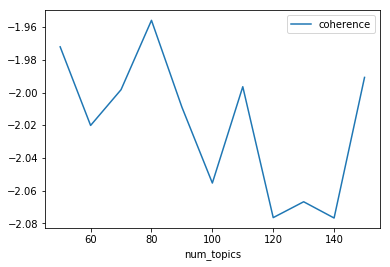

In [141]:
result_df.plot(x='num_topics', y='coherence', kind='line')

##### best lda model

In [143]:
best_k = result_df.set_index('num_topics')['coherence'].idxmax()
best_k

80

In [144]:
param_dict = {'num_topics': best_k, 'workers': num_workers,
              'chunksize': len(corpus)//3, 'passes': 5}

In [145]:
lda = ldamulticore.LdaMulticore(corpus=corpus, id2word=dictionary, 
                                **param_dict)

save model

In [146]:
model_path = "./ldamodel"

In [147]:
lda.save(model_path)

topic representation

In [148]:
for i, topic_str in lda.show_topics(num_topics=10, num_words=10):
    print('topic', i)
    print(topic_str)

topic 64
0.025*"cancer" + 0.016*"risk" + 0.014*"website" + 0.013*"hope" + 0.013*"information" + 0.012*"http" + 0.012*"yasser" + 0.012*"mokhtar" + 0.012*"//doctorslounge" + 0.012*"dear"
topic 44
0.030*"symptom" + 0.020*"seizure" + 0.015*"effect" + 0.010*"side" + 0.010*"medication" + 0.009*"doctor" + 0.008*"nausea" + 0.008*"headache" + 0.007*"neurologist" + 0.006*"occur"
topic 53
0.014*"doctor" + 0.010*"problem" + 0.009*"year" + 0.009*"good" + 0.008*"time" + 0.008*"day" + 0.006*"make" + 0.006*"find" + 0.006*"normal" + 0.006*"sperm"
topic 72
0.028*"doctor" + 0.026*"infection" + 0.016*"wish" + 0.012*"symptom" + 0.011*"recommend" + 0.010*"follow" + 0.008*"good" + 0.008*"uti" + 0.008*"luck" + 0.007*"problem"
topic 1
0.015*"pregnancy" + 0.012*"blood" + 0.011*"test" + 0.010*"doctor" + 0.010*"bleed" + 0.010*"time" + 0.010*"problem" + 0.008*"normal" + 0.006*"question" + 0.006*"year"
topic 69
0.016*"bowel" + 0.011*"drug" + 0.010*"abilify" + 0.008*"stool" + 0.007*"problem" + 0.007*"buy" + 0.007*"d

##### get wide table

In [149]:
doc_topic_dist = lda.get_document_topics(bow=corpus, minimum_probability=0)
type(doc_topic_dist)

gensim.interfaces.TransformedCorpus

In [150]:
len(doc_topic_dist)

47904

In [151]:
doc_topic_df = list()
for i in range(len(doc_topic_dist)):
    tmp_df = pd.DataFrame(doc_topic_dist[i],
                          columns=['topic', 'probability'])
    tmp_df['doc_index'] = i
    doc_topic_df.append(tmp_df)
doc_topic_df = pd.concat(doc_topic_df, ignore_index=True)
doc_topic_df.head(2)

,topic,probability,doc_index
0,0,0.000368,0
1,1,0.000368,0


reshape dataframe

In [152]:
wide_dt_df = doc_topic_df.pivot_table(index='doc_index', columns=['topic'], values='probability')
wide_dt_df.head(2)

topic,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
doc_index,,,,,,,,,,,,,,,,,,,,,
0,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.249848,0.000368,...,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368
1,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,...,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140


In [153]:
pd.np.all(wide_dt_df.isnull().sum() == 0)

True

In [154]:
wide_dt_df.to_csv('doc-topic-df.csv')

##### topical diverity

In [155]:
import scipy as sp

In [156]:
wide_dt_df.loc[0].values[:5]

array([ 0.00036765,  0.00036765,  0.00036765,  0.00036765,  0.00036765])

In [157]:
sp.stats.entropy(wide_dt_df.loc[0].values)

1.1925764861694019

In [158]:
def calc_topic_diversity(i, val):
    return i, sp.stats.entropy(val)

In [159]:
i = 3
calc_topic_diversity(i, wide_dt_df.loc[i].values)

(3, 0.82389519334276695)

In [160]:
n_jobs = 25

In [161]:
doc_topic_diversity_df = Parallel(n_jobs=n_jobs)(delayed(calc_topic_diversity)(i, val.values) for i, val in wide_dt_df.iterrows())
doc_topic_diversity_df = pd.DataFrame(doc_topic_diversity_df, columns=['doc_index', 'topic_diversity'])

In [162]:
doc_topic_diversity_df.head(2)

,doc_index,topic_diversity
0,0,1.192576
1,1,1.072967


In [163]:
pd.np.all(doc_topic_diversity_df.doc_index==doc_topic_diversity_df.index)

True

In [164]:
doc_topic_diversity_df.shape[0], df.shape[0]

(47904, 47904)

In [165]:
df['topic_diversity'] = doc_topic_diversity_df['topic_diversity']
df.head(2)

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease,id,sentiment_score,topic_diversity
0,30.0,0.80,0.68,1,1,"hi there, I am a 22 year old male of Indian b...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,q0,0.6130,1.192576
1,68.0,0.68,0.00,0,0,"Hello,Hypertrichosis relates to excessive grow...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,a0_0,0.9169,1.072967


In [166]:
df.text.isnull().sum()

0

maybe keep the text and age

In [167]:
#df.drop(columns=['text', 'age']).to_csv('./ohc_data.csv', index=False)
#df.drop(columns=['text', 'age']).to_stata('./ohc_data.dta')

---

#### export 

In [168]:
df.to_csv('./ohc_data.csv', index=False)
df.drop(columns=['text']).to_stata('./ohc_data.dta')

In [169]:
df = pd.read_csv('ohc_data.csv')
df.head(2)

,age,politeness,politeness_web,question_flag,role_dummy,text,url,gender_dummy,disease,id,sentiment_score,topic_diversity
0,30.0,0.80,0.68,1,1,"hi there, I am a 22 year old male of Indian b...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,q0,0.6130,1.192576
1,68.0,0.68,0.00,0,0,"Hello,Hypertrichosis relates to excessive grow...",f=79&t=46845&sid=b9f93eff1d31e0c2adf2ca3a89e06145,0,Dermatology Topics,a0_0,0.9169,1.072967


In [170]:
df.shape

(47904, 12)